<a href="https://colab.research.google.com/github/Ste1nb0cK/Proyecto--Simulaci-n-Gas/blob/main/CodAnimaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install moviepy

In [2]:
import random
import numpy as np
from ParticleClass import hello as hell
from FuncionesGeneradorasListas import FuncionesListas as fl
import matplotlib.pyplot as plt
from FGeneradora import FuncionGeneradora as fg
import glob
import moviepy.editor as mpy
from skimage.draw import *

In [8]:
%load_ext Cython

In [19]:
%%time
%%cython 
#Se importan las cosas necesarias 
from ParticleClass import hello as hell
import timeit
from FuncionesGeneradorasListas import FuncionesListas as fl
import matplotlib.pyplot as plt
from FGeneradora import FuncionGeneradora as fg
import multiprocessing as mp 


def simulate(float v1, float v2, float dt, float Lx, float Ly, int n, float m, float r, int nt):
    cdef int j,k,i   #Fijamos j,k,i como enteros. Estos van a ser las variables con que se itera.
    par = fg.funcion_generadora(Lx,Ly,v1,v2,m,r,n) #se crea la configuración inicial de las partículas
    lista_posiciones = fl.listas_para_llenar_posiciones(n) ## lista que contiene las posiciones de cada partícula 
                                                           ## en cada paso
    lista_velocidades = fl.listas_para_llenar_componentes_velocidad(n) #Lista con las velocidades

    for j in range(nt):

        for k in range(n):
            lista_posiciones[k][0].append(par[k].posicion[0])  #Se añade la posición en x de cada partícula
            lista_posiciones[k][1].append(par[k].posicion[1])  #Se añade la posicion en y de cada partícula
            lista_velocidades[k][0].append(par[k].velocidad[0]) #Se añade la velocidad en x de cada partícula
            lista_velocidades[k][1].append(par[k].velocidad[1]) #Se añade la velocidad en y de cada partícula
        for p in par:     
            for i in range(par.index(p)+1,n): #Revisamos las colisiones entre partículas
                if  p.posicion[0] == par[i].posicion[0] and p.posicion[1] == par[i].posicion[1]:
                    continue 

                elif p.ver_colision_pp(par[i])  :
                    #print("CHOQUE")
                    p.resolver_colision_particula(par[i])
        for p in par: 
            if p.ver_colision_muro(Lx,Ly): #Revisamos las condiciones de choque con la caja
                p.resolver_colision_muro(Lx,Ly)
            elif p.ver_colision_esquina(Lx,Ly): #Revisamos las condiciones de choque con las esquinas
                p.resolver_colision_esquina()
            p.paso_dt(dt)
    return lista_posiciones, lista_velocidades  #Retorna la lista con las posiciones y la lista con las velocidades

#Parametros simulación
v1 = 100  #Velocidad mínima
v2 = 200  #Velocidad máxima
dt = 0.01 #tamaño del paso
Lx = 800 #Tamñaño de la caja 
Ly = 800 
n = 20 #número de partículas
m = 1 #masa 
r = 5 #radio
nt  = 100 #número de pasos


c = simulate(v1,v2,dt,Lx,Ly,n,m,r,nt)
lista_posiciones = c[0]
lista_velocidades = c[1]

Wall time: 20.5 s


In [20]:
ListaOf = lista_posiciones 

In [21]:
#BoxOf sera la imagen en donde se mueve la particula, las dimensiones dependen del recorrido de la particula 
BoxOf=np.zeros((900,900))

########Creación de las imagenes########
#En principio este codigo funciona para n particulas pero debe estar definida la lista ListaOf con anterioridad

#En Gif se guardaran cada una de las imagenes 
Gif=[]

for x in range(0,len(ListaOf[0][1])):
  for i in range(0,len(ListaOf)):
    x1,y1=circle(ListaOf[i][0][x]+50,ListaOf[i][1][x]+50,5)
    BoxOf[x1,y1]=255
  Gif.append(np.copy(BoxOf))
  BoxOf=np.zeros((900,900))


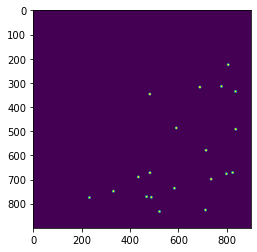

In [24]:
########Descarga de las imagenes########
#Con esto descarga cada una de las imagenes, el archivo descomprime las imagenes en drive, por lo cual recuerde cambiar la ruta
#Las imagenes se guardan en formato png y se guardan en orden cuando son menos de 10000 imagenes

for x in range(0,len(Gif)):
  if x<10:
    plt.imshow(Gif[x])
    plt.savefig("C:\\Users\\danyp\\Desktop\\CosasPater\\UNAL\\Tercer semestre\\Programacion y metodos numericos\\Animacion\\frame_1\\img000{0}.png".format(x), bbox_inches='tight') 
  elif x<100:
    plt.imshow(Gif[x])
    plt.savefig("C:\\Users\\danyp\\Desktop\\CosasPater\\UNAL\\Tercer semestre\\Programacion y metodos numericos\\Animacion\\frame_1\\img00{0}.png".format(x), bbox_inches='tight') 
  elif x<1000:
    plt.imshow(Gif[x])
    plt.savefig("C:\\Users\\danyp\\Desktop\\CosasPater\\UNAL\\Tercer semestre\\Programacion y metodos numericos\\Animacion\\frame_1\\img0{0}.png".format(x), bbox_inches='tight') 
  elif x<10000:
    plt.imshow(Gif[x])
    plt.savefig("C:\\Users\\danyp\\Desktop\\CosasPater\\UNAL\\Tercer semestre\\Programacion y metodos numericos\\Animacion\\frame_1\\img{0}.png".format(x), bbox_inches='tight') 



In [4]:
########Creación del Gif########

#GifOfFinal es una lista donde sus elementos son las imagenes, estoy usando una libreria que manipula documentos, por lo cual se debe cambiar la ruta 
GifOfFinal = sorted(glob.glob('C:\\Users\\danyp\\Desktop\\CosasPater\\UNAL\\Tercer semestre\\Programacion y metodos numericos\\Animacion\\frame_1\\*.png'))  
GifOfFinal.sort() 

#Dependiendo del numero de imagenes cambio el valor de la variable fps
fps = 50
clip = mpy.ImageSequenceClip(GifOfFinal, fps=fps)
clip.write_gif('C:\\Users\\danyp\\Desktop\\CosasPater\\UNAL\\Tercer semestre\\Programacion y metodos numericos\\Animacion\\Videos\\movieOf2.0.gif')

#El gif se guarda dentro de la consola asi que debe descargarlo 

t:   9%|██████▏                                                              | 9/101 [00:00<00:03, 25.15it/s, now=None]

MoviePy - Building file C:\Users\danyp\Desktop\CosasPater\UNAL\Tercer semestre\Programacion y metodos numericos\Animacion\Videos\movieOf2.0.gif with imageio.


In [28]:
####Con esto puede comprobar la informacion dentro de las listas###
#print("Datos x")
#print(ListaOf[0][0])
#print(ListaOf[1][0])
#print("Datos y")
#print(ListaOf[0][1])
#print(ListaOf[1][1])
print(len(ListaOf[0][0]))


400


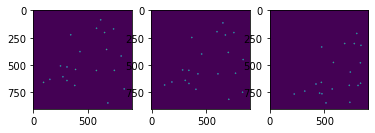

In [22]:
plt.subplot(1,3,1)
plt.imshow(Gif[0])
plt.subplot(1,3,2)
plt.imshow(Gif[20])
plt.subplot(1,3,3) 
plt.imshow(Gif[90])